In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import warnings
from pathlib import Path
warnings.filterwarnings('ignore')

import os, sys
curruser = os.environ.get('USER')
sys.path.insert(0, './../src/')
sys.path.insert(0, '/home/{}/notebooks/support_library/'.format(curruser)) 
sys.path.insert(0, '/home/{}/python35-libs/lib/python3.5/site-packages/'.format(curruser))
# sys.path.insert(0, '/home/ektov/notebooks/labdata/lib/')

import re 
import time
import joblib
import gc
import numpy as np
import pandas as pd
import subprocess
# from sshloader import Ssh
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.max_columns = 1000


# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.set_option('display.max_colwidth', -1)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

from csv import QUOTE_ALL 

from tqdm import tqdm
from tqdm._tqdm_notebook import tqdm_notebook
# tqdm_notebook.pandas()

import feature_importance

import sklearn
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedShuffleSplit, StratifiedKFold

from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, \
                            classification_report, precision_score, \
                            recall_score, roc_curve, precision_recall_curve, \
                            average_precision_score, make_scorer, confusion_matrix, get_scorer
            
from sklearn.preprocessing import binarize, OneHotEncoder


print(sklearn.__version__)
print(xgboost.__version__)
print(pd.__version__)

0.22.2.post1
0.81
0.25.3


## Fetch data for Training

### Fetch previously sampled data with 60% fraction

In [11]:
%%time
csvpath = Path.joinpath(Path(os.getcwd()),'csv','data4train_sampled_60pct.csv')
df = pd.read_csv(csvpath, encoding='cp1251', sep=';', compression='gzip')

CPU times: user 13min 17s, sys: 1min 25s, total: 14min 42s
Wall time: 14min 42s


In [4]:
Counter(df.target)

Counter({0.0: 4612709, 1.0: 2259592})

### Or fetch all data from list of files

In [3]:
%%time
path = './csv/sampled_data_vector_train/'
filelist = os.listdir(path)
# df=pd.DataFrame([])
# df = pd.read_csv(filepath_or_buffer = path+filelist[0], sep = ';', nrows=0, compression = 'gzip', engine='python',
#                  dtype = {'target' : np.int32, 'OPF_IP': np.float32 ,'OPF_OOO': np.float32 ,'OPF_Other': np.float32 ,'ab_borrowed_capital': np.float32 ,'ab_immobilized_assets': np.float32 ,'ab_losses': np.float32 ,'ab_own_capital': np.float32 ,'acquiring_mobile': np.float32 ,'acquiring_torg': np.float32 ,'acreditiv': np.float32 ,'active_flg': np.float32 ,'all_prod_deals_completed': np.float32 ,'all_prod_deals_created': np.float32 ,'arenda_seyf': np.float32 ,'bank_straxovanie_imush': np.float32 ,'bank_straxovanie_lich': np.float32 ,'bank_straxovanie_otvet': np.float32 ,'branch_cnt': np.float32 ,'campaign_nm': np.float32 ,'cash_management': np.float32 ,'corp_cards': np.float32 ,'corp_cards_prod_deals_completed': np.float32 ,'corp_cards_prod_deals_created': np.float32 ,'corporate_cards': np.float32 ,'cred_application_cnt': np.float32 ,'cred_sdo': np.float32 ,'credit': np.float32 ,'credit_prod_deals_completed': np.float32 ,'credit_prod_deals_created': np.float32 ,'dbo': np.float32 ,'deposit': np.float32 ,'deposit_sertificat': np.float32 ,'deposits': np.float32 ,'depozit_prod_deals_completed': np.float32 ,'depozit_prod_deals_created': np.float32 ,'egr_org_id': np.float32 ,'egrul_org_id': np.float32 ,'einvoicing': np.float32 ,'email': np.float32 ,'factoring': np.float32 , 'fot_balance': np.float32, 'founders_all_cnt': np.float32 ,'founders_fl_cnt': np.float32 ,'founders_foreign_ul_cnt': np.float32 ,'founders_ul_cnt': np.float32 ,'fresh_user': np.float32 ,'garantee_gos': np.float32 ,'garantee_kontract': np.float32 ,'garantee_other': np.float32 ,'gis_bank_payment_flg': np.float32 ,'gis_card_payment_flg': np.float32 ,'gis_cash_payment_flg': np.float32 ,'gis_internet_merchant_flg': np.float32 ,'gis_internet_payment_flg': np.float32 ,'gis_merchant_cnt': np.float32 ,'gis_network_flg': np.float32 ,'gis_opt_merchant_flg': np.float32 ,'gis_production_merchant_flg': np.float32 ,'gis_rosn_merchant_flg': np.float32 ,'industry': np.float32 ,'inkass': np.float32 ,'insure_prod_deals_completed': np.float32 ,'insure_prod_deals_created': np.float32 ,'integrum_lower_bound': np.float32 ,'invest_kredit': np.float32 ,'ip_flg': np.float32 ,'konversion': np.float32 ,'kpp_regions_cnt': np.float32 ,'last_click_all_cnt_m11': np.float32 ,'last_click_all_cnt_m21': np.float32 ,'last_click_all_cnt_m31': np.float32 ,'last_click_day_cnt_m11': np.float32 ,'last_click_day_cnt_m21': np.float32 ,'last_click_day_cnt_m31': np.float32 ,'last_open_all_cnt_m11': np.float32 ,'last_open_all_cnt_m21': np.float32 ,'last_open_all_cnt_m31': np.float32 ,'last_open_day_cnt_m11': np.float32 ,'last_open_day_cnt_m21': np.float32 ,'last_open_day_cnt_m31': np.float32 ,'license_cnt': np.float32 ,'main_inn': np.float32 ,'main_kpp': np.float32 ,'main_organization_id': np.float32 ,'max_zp_empl_cnt': np.float32 ,'merch': np.float32 ,'merch_prod_deals_completed': np.float32 ,'merch_prod_deals_created': np.float32 ,'min_zp_empl_cnt': np.float32 ,'ns_servis': np.float32 ,'ns_terminal': np.float32 ,'oborot_kredit': np.float32 ,'obsluzh_rts_rur': np.float32 ,'obsluzh_rts_val': np.float32 ,'overdraft_kredit': np.float32 ,'products_lizing': np.float32 ,'proekt_finans': np.float32 ,'rko': np.float32 ,'salary': np.float32 ,'salary_prod_deals_completed': np.float32 ,'salary_prod_deals_created': np.float32 ,'samoinkass': np.float32 ,'spec_acc': np.float32 ,'stoplist': np.float32 ,'target': np.float32 ,'tb_Centralno_Chernozemnyj': np.float32 ,'tb_Dalnevostochnyj': np.float32 ,'tb_Moskovskij': np.float32 ,'tb_Povolzhskij': np.float32 ,'tb_Severo_Zapadnyj': np.float32 ,'tb_Uralskij': np.float32 ,'tb_Volgo_Vyatskij': np.float32 ,'total_count_dt': np.float32 ,'total_count_dt_3m': np.float32 ,'total_count_dt_year18': np.float32 ,'total_count_kt': np.float32 ,'total_count_kt_3m': np.float32 ,'total_count_kt_year18': np.float32 ,'ul_org_id': np.float32 ,'valuta_control': np.float32 ,'veksel': np.float32 ,'zarplat_projects': np.float32, 'sum_open_click_camp': np.float32, 'ul_kopf_cd': np.float32 },   
#                  usecols = lambda columns : columns not in ['text', 'text_norm', 'inn', 'kpp', 'organization_id', 'email','campaign_nm', 'idx', 'fresh_user', 'complicity_type', 'ogrn', 'sum_open_click_camp'] 
#                  )
df = pd.read_csv(filepath_or_buffer = path+filelist[0], sep = ';', nrows=0, compression = 'gzip',
                 usecols = lambda columns : columns not in ['text', 'text_norm', 'inn', 'kpp', 'organization_id', 
                                                            'email','campaign_nm', 'idx', 'fresh_user', 'complicity_type', 
                                                            'ogrn', 'sum_open_click_camp'] 
                 )
for file in tqdm_notebook(filelist[:3]+filelist[4:]): #filelist[:3]+filelist[4:]
    if 'csv' in file:
        print(file)
        dftmp = pd.read_csv(filepath_or_buffer = path+file ,sep = ';', quoting = QUOTE_ALL,
                            doublequote = False,
                            index_col=False, 
                            error_bad_lines=False,
                            usecols = df.columns,
                            compression = 'gzip'
                           )
        
        df = pd.concat([df,dftmp], ignore_index=True)
        del dftmp
        print(df.shape)

part-00000-837850b4-4251-4919-9756-8b623b270d72-c000.csv.gz
(2141716, 515)
part-00001-837850b4-4251-4919-9756-8b623b270d72-c000.csv.gz
(4218563, 515)
part-00002-837850b4-4251-4919-9756-8b623b270d72-c000.csv.gz
(6390680, 515)
part-00004-837850b4-4251-4919-9756-8b623b270d72-c000.csv.gz
(8724269, 515)
part-00005-837850b4-4251-4919-9756-8b623b270d72-c000.csv.gz
(11453836, 515)

CPU times: user 19min 57s, sys: 5min 12s, total: 25min 10s
Wall time: 25min 10s


### Fetching data for Test

In [ ]:
%%time
path = './csv/sampled_data_vector_test/'
filelist = os.listdir(path)
# df=pd.DataFrame([])
# df_test = pd.read_csv(filepath_or_buffer = path+filelist[0], sep = ';', nrows=0, compression = 'gzip',
#                  dtype = {'target' : np.int32, 'OPF_IP': np.float32 ,'OPF_OOO': np.float32 ,'OPF_Other': np.float32 ,'ab_borrowed_capital': np.float32 ,'ab_immobilized_assets': np.float32 ,'ab_losses': np.float32 ,'ab_own_capital': np.float32 ,'acquiring_mobile': np.float32 ,'acquiring_torg': np.float32 ,'acreditiv': np.float32 ,'active_flg': np.float32 ,'all_prod_deals_completed': np.float32 ,'all_prod_deals_created': np.float32 ,'arenda_seyf': np.float32 ,'bank_straxovanie_imush': np.float32 ,'bank_straxovanie_lich': np.float32 ,'bank_straxovanie_otvet': np.float32 ,'branch_cnt': np.float32 ,'campaign_nm': np.float32 ,'cash_management': np.float32 ,'corp_cards': np.float32 ,'corp_cards_prod_deals_completed': np.float32 ,'corp_cards_prod_deals_created': np.float32 ,'corporate_cards': np.float32 ,'cred_application_cnt': np.float32 ,'cred_sdo': np.float32 ,'credit': np.float32 ,'credit_prod_deals_completed': np.float32 ,'credit_prod_deals_created': np.float32 ,'dbo': np.float32 ,'deposit': np.float32 ,'deposit_sertificat': np.float32 ,'deposits': np.float32 ,'depozit_prod_deals_completed': np.float32 ,'depozit_prod_deals_created': np.float32 ,'egr_org_id': np.float32 ,'egrul_org_id': np.float32 ,'einvoicing': np.float32 ,'email': np.float32 ,'factoring': np.float32 , 'fot_balance': np.float32, 'founders_all_cnt': np.float32 ,'founders_fl_cnt': np.float32 ,'founders_foreign_ul_cnt': np.float32 ,'founders_ul_cnt': np.float32 ,'fresh_user': np.float32 ,'garantee_gos': np.float32 ,'garantee_kontract': np.float32 ,'garantee_other': np.float32 ,'gis_bank_payment_flg': np.float32 ,'gis_card_payment_flg': np.float32 ,'gis_cash_payment_flg': np.float32 ,'gis_internet_merchant_flg': np.float32 ,'gis_internet_payment_flg': np.float32 ,'gis_merchant_cnt': np.float32 ,'gis_network_flg': np.float32 ,'gis_opt_merchant_flg': np.float32 ,'gis_production_merchant_flg': np.float32 ,'gis_rosn_merchant_flg': np.float32 ,'industry': np.float32 ,'inkass': np.float32 ,'insure_prod_deals_completed': np.float32 ,'insure_prod_deals_created': np.float32 ,'integrum_lower_bound': np.float32 ,'invest_kredit': np.float32 ,'ip_flg': np.float32 ,'konversion': np.float32 ,'kpp_regions_cnt': np.float32 ,'last_click_all_cnt_m11': np.float32 ,'last_click_all_cnt_m21': np.float32 ,'last_click_all_cnt_m31': np.float32 ,'last_click_day_cnt_m11': np.float32 ,'last_click_day_cnt_m21': np.float32 ,'last_click_day_cnt_m31': np.float32 ,'last_open_all_cnt_m11': np.float32 ,'last_open_all_cnt_m21': np.float32 ,'last_open_all_cnt_m31': np.float32 ,'last_open_day_cnt_m11': np.float32 ,'last_open_day_cnt_m21': np.float32 ,'last_open_day_cnt_m31': np.float32 ,'license_cnt': np.float32 ,'main_inn': np.float32 ,'main_kpp': np.float32 ,'main_organization_id': np.float32 ,'max_zp_empl_cnt': np.float32 ,'merch': np.float32 ,'merch_prod_deals_completed': np.float32 ,'merch_prod_deals_created': np.float32 ,'min_zp_empl_cnt': np.float32 ,'ns_servis': np.float32 ,'ns_terminal': np.float32 ,'oborot_kredit': np.float32 ,'obsluzh_rts_rur': np.float32 ,'obsluzh_rts_val': np.float32 ,'overdraft_kredit': np.float32 ,'products_lizing': np.float32 ,'proekt_finans': np.float32 ,'rko': np.float32 ,'salary': np.float32 ,'salary_prod_deals_completed': np.float32 ,'salary_prod_deals_created': np.float32 ,'samoinkass': np.float32 ,'spec_acc': np.float32 ,'stoplist': np.float32 ,'target': np.float32 ,'tb_Centralno_Chernozemnyj': np.float32 ,'tb_Dalnevostochnyj': np.float32 ,'tb_Moskovskij': np.float32 ,'tb_Povolzhskij': np.float32 ,'tb_Severo_Zapadnyj': np.float32 ,'tb_Uralskij': np.float32 ,'tb_Volgo_Vyatskij': np.float32 ,'total_count_dt': np.float32 ,'total_count_dt_3m': np.float32 ,'total_count_dt_year18': np.float32 ,'total_count_kt': np.float32 ,'total_count_kt_3m': np.float32 ,'total_count_kt_year18': np.float32 ,'ul_org_id': np.float32 ,'valuta_control': np.float32 ,'veksel': np.float32 ,'zarplat_projects': np.float32, 'sum_open_click_camp': np.float32, 'ul_kopf_cd': np.float32 },   
#                  usecols = lambda columns : columns not in ['text', 'text_norm', 'inn', 'kpp', 'organization_id', 'email','campaign_nm', 'idx', 'fresh_user', 'complicity_type', 'ogrn', 'sum_open_click_camp'] 
#                  )
df_test = pd.read_csv(filepath_or_buffer = path+filelist[0], sep = ';', nrows=0, compression = 'gzip',
                      usecols = lambda columns : columns not in ['text', 'text_norm', 'inn', 'kpp', 'organization_id', 
                                                                 'email','campaign_nm', 'idx', 'fresh_user', 
                                                                 'complicity_type', 'ogrn', 'sum_open_click_camp'] 
                 )
for file in tqdm_notebook(filelist[:3]+filelist[4:]): #filelist[:3]+filelist[4:]
    if 'csv' in file:
        print(file)
        dftmp = pd.read_csv(filepath_or_buffer = path+file ,sep = ';', quoting = QUOTE_ALL,
                            doublequote = False,
                            index_col=False, 
                            error_bad_lines=False,
                            usecols = df_test.columns,
                            compression = 'gzip'
                           )
        
        df_test = pd.concat([df_test,dftmp], ignore_index=True)
        del dftmp
        print(df_test.shape)

## Simple Preproc Stage

In [4]:
readFromFile=1

In [5]:
%%time 
print("df shape before preproc: {}".format(df.shape))

# Train
# Columns to drop because there is no variation in training set
if not readFromFile:
    zero_std_cols_train = df.columns[df.std(axis=0) == 0.].values.tolist()
else:
    with open('./zero_std_cols_train', 'r') as f:
        zero_std_cols_train = f.readlines()
    zero_std_cols_train = [line.split('\n')[0]  for line in zero_std_cols_train]  
    
df.drop(columns=zero_std_cols_train, axis=1, inplace=True)
print('Removed {} constant columns'.format(len(zero_std_cols_train)))
print("df shape after preproc: {}".format(df.shape))

# Test preprocessing
df_test.drop(columns=zero_std_cols_train, axis=1, inplace=True)
print('Removed {} constant columns'.format(len(zero_std_cols_train)))
print("df_test shape after preproc: {}".format(df_test.shape))

df shape before preproc: (11453836, 515)
Removed 76 constant columns
df shape after preproc: (11453836, 439)
CPU times: user 1min 1s, sys: 1min 37s, total: 2min 39s
Wall time: 2min 39s


In [ ]:
with open('./zero_std_cols_train', 'w') as f:
    f.writelines("\n".join(zero_std_cols_train))

In [14]:
gc.collect()

1816

## Load Pretrained XGB Model

In [6]:
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, \
                            classification_report, precision_score, \
                            recall_score, roc_curve, precision_recall_curve, \
                            average_precision_score, make_scorer, confusion_matrix, get_scorer

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedShuffleSplit, StratifiedKFold
from sklearn.pipeline import Pipeline, FeatureUnion
from time import time

In [7]:
def get_metrics(y_pred, y, average='binary'):
    print(classification_report(y, y_pred, digits=5, ))
    recall = recall_score(y, y_pred, average=average)
    precision=precision_score(y, y_pred,average=average)
    f1=f1_score(y, y_pred,average=average)
    
    return recall, precision, f1

def feature_impotance(model, X_train, count_top_features = 20):
    imp=model.feature_importances_
    names=X_train.columns
    imp, names=map(list, zip(*sorted(zip(imp, names))[::-1][:count_top_features]))
    
    fig, ax = plt.subplots(figsize=(9,12))
    #ax = plt.axes()
    sns.barplot(x=imp, y=names, palette=sns.color_palette('YlGn', 2), ax=ax)
    ax.set_title('Top ' + str(count_top_features) + ' important features')
    plt.show()

In [ ]:
classifier = joblib.load('./pkl/xgb_cls_tuned_pipe_wFT_200606.pkl')
xgb = classifier['clf']
xgb

In [ ]:
isretrain=False

xgb_params = xgb.get_params()
if isretrain:
    xgb_params = dict(xgb_params,**{'update':'refresh',
                                    'process_type':'update',
                                    'refresh_leaf':True,
                                    'xgb_model':xgb})

In [ ]:
classifier = XGBClassifier(**xgb_params)
classifier

## Shuffle rows

In [8]:
X_train, X_test, y_train, y_test = \
train_test_split(df.drop(['target'], axis=1), df.target, 
                 random_state=42, shuffle=True, test_size=0.08)

# X_train = df_part[respcols+ml360cols].drop(['target'], axis=1)
# y_train = df_part.target

# df.sample(frac=1,shuffle=True, inplace=True)
# X_train, y_train = df.drop(['target'], axis=1), df.target

In [ ]:
X_val, y_val = df_test.drop(['target'], axis=1), df_test.target

In [14]:
X_train.shape, X_test.shape

((6322516, 438), (549785, 438))

## Training Step

In [ ]:
classifier.fit(X_train.astype(dtype=np.float32), y_train)

In [20]:
y_pred = classifier.predict(X_test.astype(dtype=np.float32))

recall_ts, precision_ts, f1_ts =  get_metrics(y_pred.astype(int), y_test.astype(int))
                                                  
print('Hold Out: ')
print('Precision: %7.5f, Recall: %7.5f, F_1: %7.5f' % 
(precision_ts, recall_ts, f1_ts))

              precision    recall  f1-score   support

           0    0.75497   0.72030   0.73723    614522
           1    0.47916   0.52396   0.50056    301785

    accuracy                        0.65564    916307
   macro avg    0.61707   0.62213   0.61890    916307
weighted avg    0.66413   0.65564   0.65928    916307

Hold Out: 
Precision: 0.47916, Recall: 0.52396, F_1: 0.50056


In [ ]:
joblib.dump(classifier, './pkl/xgb_best_param_wFT_10M_200613.pkl')

In [24]:
gc.collect()

2179

## Use CalibratedClassifierCV with sigmoid and isotonic parameters

In [9]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.preprocessing import OneHotEncoder

In [19]:
classifier = joblib.load('./pkl/xgb_best_param_wFT_10M_200613.pkl')

In [11]:
y_proba = classifier.predict_proba(X_test.astype(float))[:, 1]

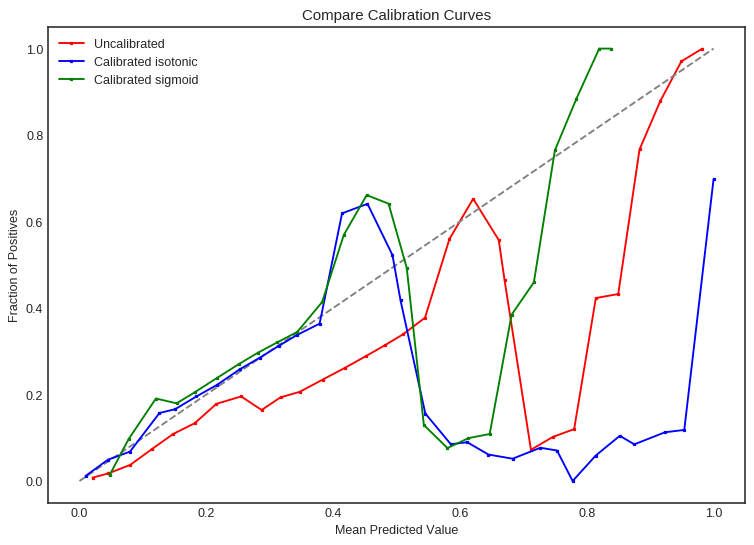

In [12]:
plt.figure(figsize=(10,7), dpi=90)
plt.style.use('seaborn-white')

fraction_of_pos, mean_pred_val = calibration_curve(np.array(y_test.tolist(), dtype=np.float32), y_proba, n_bins=30)
plt.plot(mean_pred_val, fraction_of_pos, 's-', markersize=2, color='red', label='Uncalibrated')
plt.plot([0,1],[0,1],'--',color='gray')

methodlst=['isotonic','sigmoid',]
clr=['blue','green']
i=0
for method in methodlst:
    clf_calib=CalibratedClassifierCV(classifier, cv='prefit', method=method, xdtype=pd.core.frame.DataFrame)
  
    try:
        clf_calib.fit(X_train.astype(dtype=np.float32), y_train.astype(dtype=np.float32))
    except ValueError as err:
        print("Cols mismatched... Try to catch cols order from error message-->")
        colsstr     = str(err).split('feature_names mismatch: ')[1].split(' [')[0]
        getcolslist = list(ast.literal_eval(colsstr[1:-1]))
        _X_train = X_train[getcolslist].astype(dtype=np.float32)
        clf_calib.fit(_X_train, y_train)
        
    y_tst_clf_calib_proba=clf_calib.predict_proba(X_test.astype(dtype=np.float32))[:,1]
    fraction_of_pos, mean_pred_val = calibration_curve(np.array(y_test.tolist()), y_tst_clf_calib_proba, n_bins=30)
    plt.plot(mean_pred_val, fraction_of_pos, 's-', markersize=2, color=clr[i], label='Calibrated %s' % method)
    i=i+1
    
plt.xlabel('Mean Predicted Value')
plt.ylabel('Fraction of Positives')
plt.legend(loc='best')
plt.title('Compare Calibration Curves')
plt.show()

In [13]:
gc.collect()

2677

## Choose SigmoId Method and obtain recalibated proba

In [ ]:
methodlst=['sigmoid']
for method in methodlst:
    clf_calib=CalibratedClassifierCV(classifier, cv='prefit', method=method, xdtype=pd.core.frame.DataFrame)
  
    try:
        clf_calib.fit(X_train.astype(dtype=np.float32), y_train.astype(dtype=np.float32))
    except ValueError as err:
        print("Cols mismatched... Try to catch cols order from error message-->")
        colsstr     = str(err).split('feature_names mismatch: ')[1].split(' [')[0]
        getcolslist = list(ast.literal_eval(colsstr[1:-1]))
        _X_train = X_train[getcolslist].astype(dtype=np.float32)
        clf_calib.fit(_X_train, y_train)
        
    y_tst_clf_calib_proba=clf_calib.predict_proba(X_test.astype(dtype=np.float32))[:,1]
 

In [ ]:
joblib.dump(clf_calib,'./pkl/CalibratedClassifierCV_xgb_10M.pkl')

## Load calibrated cls with sigmoid preferred method

In [15]:
clf_calib = joblib.load('./pkl/CalibratedClassifierCV_xgb_10M.pkl')
y_tst_clf_calib_proba=clf_calib.predict_proba(X_test.astype(dtype=np.float32))[:,1]

In [16]:
max_proba = np.max(y_tst_clf_calib_proba)
min_proba = np.min(y_tst_clf_calib_proba)

scaled_proba_calib = np.array([(proba-min_proba)/(max_proba-min_proba) for proba in y_tst_clf_calib_proba])

In [17]:
# classification report after recalibration of proba
threshold=0.50
y_pred = binarize(scaled_proba_calib.reshape(-1, 1), threshold=threshold).reshape(-1)

recall_ts, precision_ts, f1_ts =  get_metrics(y_pred.astype(int), y_test.astype(int))
                                                  
print('Hold Out: ')
print('Precision: %7.5f, Recall: %7.5f, F_1: %7.5f' % 
(precision_ts, recall_ts, f1_ts))

              precision    recall  f1-score   support

           0    0.74819   0.76013   0.75411    614522
           1    0.49514   0.47905   0.48696    301785

    accuracy                        0.66755    916307
   macro avg    0.62166   0.61959   0.62054    916307
weighted avg    0.66485   0.66755   0.66612    916307

Hold Out: 
Precision: 0.49514, Recall: 0.47905, F_1: 0.48696


In [18]:
del y_pred, y_tst_clf_calib_proba, scaled_proba_calib, clf_calib

# USE SberAutoML PipeLine

In [9]:
import sber_ailab_automl as saa
from sber_ailab_automl import SAAClassifier, SAARegressor
import logging
logging.basicConfig(level=logging.INFO, stream=sys.stdout,
                        format='[%(asctime)-15s] %(levelname)-8s: %(message)s')
logger = logging.getLogger(__name__)

## UDM

In [7]:
def recall_metric(y_true, y_proba):
    threshold=0.50
    if isinstance(y_proba, list) and isinstance(y_true, list):
        y_proba = np.array(y_proba)  
        y_true  = np.array(y_true)  
    y_pred = binarize(y_proba.reshape(-1, 1), threshold=threshold).reshape(-1)    
    recall = recall_score(y_true, y_pred, average='binary')
    return recall

## Params Initialization

In [8]:
params = {}
params['vCPULimit'] = 50
params['memoryLimit'] = 180 * 1024
params['timeLimit'] = 3000 * 60
params['type'] = 'classification'
params['encoding'] = 'utf-8'
params['separator'] = r","
params['decimal'] = '.'
params['debugFlag'] = True
params['featureRoles'] = {
    'target': 'target',
    #'line_id': 'line_id',
    #'group': 'col_name',
    'numeric': [],
    'datetime': [],
    'string': [],
    'id': [],
    'text': []
}
params['naValues'] = None
params['rowsToAnalyze'] = 10000
params['datetimeFormat'] = '%Y-%m-%d'
params['testBatchSize'] = 100000
params['LuckySeed'] = 42
params['KFolds'] = 5
params['metric'] = recall_metric
params['featureSelParams'] = (-1, 5, True)

## Prepate Train/Test Dataset

In [29]:
import re
pattern = re.compile(r'.*_m\d{1}1')
ftcols = [col for col in list(df.columns) if '_FT_' in col]
respcols = [col for col in list(df.columns) if len(pattern.findall(col))!=0]
ml360cols = list(set(list(df.columns)) - set(respcols) - set(ftcols))

## Remove from further consideraction columns with FT vector

In [30]:
df.drop(columns=ftcols,inplace=True)

In [31]:
df.shape

(6872301, 139)

## Perform Under-Sampling to reduce size of dataset being passed for training

In [34]:
# X_train = df.sample(frac=0.6,shuffle=True, inplace=True)

sratio = 0.4
df_part = df.groupby(['target'], group_keys=False).apply(lambda x: x.sample(n=int(np.rint(sratio*len(x))), random_state=42))

X_train, X_test = \
train_test_split(df_part, random_state=42, shuffle=True, test_size=0.1)

In [35]:
X_train.shape, X_test.shape

((2474028, 139), (274893, 139))

In [36]:
del df_part
gc.collect()

139

## Train and save model 

In [ ]:
%%time
automl = saa.AutoML(vCPULimit = params['vCPULimit'], 
                    memoryLimit = params['memoryLimit'], 
                    timeLimit = params['timeLimit'], 
                    encoding = params['encoding'], 
                    separator = params['separator'], 
                    decimal = params['decimal'], 
                    datetime_format = params['datetimeFormat'], 
                    na_values = params['naValues'], 
                    analyze_rows = params['rowsToAnalyze'],
                    test_batch_size = params['testBatchSize'],
                    cv_random_state = params['LuckySeed'],
                    KFolds = params['KFolds'],
                    metric = params['metric'],
                    featureSelParams = params['featureSelParams'])

res_df, feat_imp = automl.train(X_train, params['featureRoles'], params['type'], )
automl.save('./pkl/automl_10M.pkl')

## Make a Prediction on OOB

In [10]:
%%time
automl = saa.AutoML()

automl.load('./pkl/automl_10M.pkl')

AUTOML_CONFIG = {'time_limit': 300, 'test_batch_size': 10000, 'separator': ',', 'log_file': None, 'featureSelParams': (None, 1, True), 'start_time': 1592245921.6454701, 'isTrained': False, 'encoding': 'utf-8', 'analyze_rows': 100, 'na_values': None, 'KFolds': 10, 'vCPU_limit': 4, 'memory_limit': 12, 'datetime_format': None, 'embeddings_path': None, 'use_gpu': True, 'metric': (None, None), 'decimal': b'.', 'cv_random_state': 13, 'cache_dir': None}

Start load.
dict_keys(['mode', 'aml_reg_dataset', 'separator', 'aml_dataset', 'nrows', 'KFolds', 'feat_dict', 'metric', 'aml_cats', 'fileb', 'na_values', 'time_limit', 'feat_imp', 'task', 'model', 'log_file', 'test_batch_size', 'aml_reg_models', 'cache_dir', 'w', 'aml_pipe', 'datetime_format', 'start_time', 'memory_limit', 'encoding', 'featureSelParams', 'vCPU_limit', 'decimal', 'use_ids', 'aml_feats', 'aml_reg_pipe', 'embeddings_path', 'non_negative_target', 'use_gpu', 'pfeats', 'analyze_rows', 'constant_columns', 'isTrained', 'cv_random_sta

In [17]:
y_test = X_test['target'].values

In [19]:
y_proba = preds_df['prediction'].values

In [18]:
# classification report after recalibration of proba
threshold=0.50
y_pred = binarize(preds_df['prediction'].values.reshape(-1, 1), threshold=threshold).reshape(-1)

recall_ts, precision_ts, f1_ts =  get_metrics(y_pred.astype(int), y_test.astype(int))
                                                  
print('Hold Out: ')
print('Precision: %7.5f, Recall: %7.5f, F_1: %7.5f' % 
(precision_ts, recall_ts, f1_ts))

              precision    recall  f1-score   support

           0    0.68935   0.90954   0.78428    184167
           1    0.47774   0.16798   0.24856     90726

    accuracy                        0.66479    274893
   macro avg    0.58355   0.53876   0.51642    274893
weighted avg    0.61951   0.66479   0.60747    274893

Hold Out: 
Precision: 0.47774, Recall: 0.16798, F_1: 0.24856


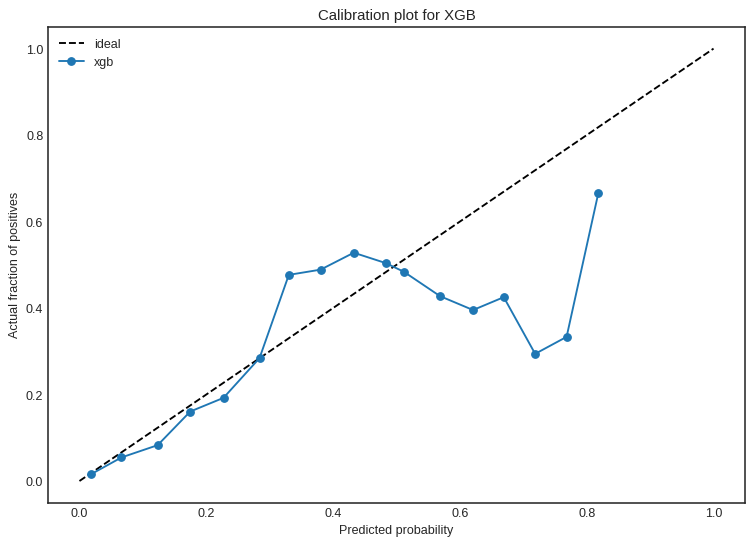

In [20]:
# creating a dataframe of target and probabilities
prob_df_xgb = pd.DataFrame({'y':y_test, 'y_hat': y_proba})

# binning the dataframe, so we can see success rates for bins of probability
bins = np.arange(0.05, 1.00, 0.05)
prob_df_xgb.loc[:,'prob_bin'] = np.digitize(prob_df_xgb['y_hat'], bins)
prob_df_xgb.loc[:,'prob_bin_val'] = prob_df_xgb['prob_bin'].replace(dict(zip(range(len(bins)), bins)))

# opening figure
plt.figure(figsize=(10,7), dpi=90)

plt.style.use('seaborn-white')

# plotting ideal line
plt.plot([0,1],[0,1], 'k--', label='ideal')

# plotting calibration for xgb
calibration_y = prob_df_xgb.groupby('prob_bin_val')['y'].mean()
calibration_x = prob_df_xgb.groupby('prob_bin_val')['y_hat'].mean()
plt.plot(calibration_x, calibration_y, marker='o', label='xgb')

# legend and titles
plt.title('Calibration plot for XGB')
plt.xlabel('Predicted probability')
plt.ylabel('Actual fraction of positives')
plt.legend()
plt.show()